In [63]:
from dotenv import load_dotenv
load_dotenv()

True

In [64]:
from langgraph.types import Command,Literal
from langchain_core.messages import HumanMessage,AIMessage,BaseMessage
from langgraph.graph import MessagesState,START,END,StateGraph
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_experimental.tools import PythonREPLTool
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool
from typing import Annotated
from pprint import pprint
from pydantic import BaseModel,Field

In [65]:
repl = PythonREPLTool()

In [ ]:
@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed your task, respond with Plot has been saved to the directory, or just tell failed to save plot."
    )

In [67]:
model = ChatGoogleGenerativeAI(model='gemini-2.0-flash',temperature=0.1)

In [68]:
agent = create_react_agent(model=model,tools=[python_repl_tool],
prompt = """You are a data visualization expert. Your job is to create informative and visually appealing plots from datasets.
IMPORTANT: The CSV files are ALWAYS located in the current working directory. No need to specify a different path.

ALWAYS follow these steps before plotting:
1. First understand the dataframe schema by running:
    ```python
   import pandas as pd
   df = pd.read_csv('users_data.csv')  # Adjust path as needed
   print(df.info())
   print(df.head())
   print(df.describe())) ```

2.Look for interesting patterns, outliers, or relationships in the data

3.Choose appropriate visualization types based on the data characteristics

4.Create aesthetically pleasing plots with proper labels, titles, and legends

5.. Never plot the diagram, ALWAYS save plots to a local temp directory in the current working directory:
    ```python
   import os
   # Create a local temp directory if it doesn't exist
   temp_dir = 'temp_plots'
   if not os.path.exists(temp_dir):
       os.makedirs(temp_dir)```

Your code should use pandas, matplotlib, seaborn, or other appropriate libraries. Make your visualizations insightful and production-ready. 

Remember: All CSV files are in the current working directory. Always use relative paths like 'processed_data.csv'.""")
   

In [69]:
agent.invoke({'messages':"Hello there"})

{'messages': [HumanMessage(content='Hello there', additional_kwargs={}, response_metadata={}, id='cf1d01b0-4bf7-4e67-9549-6d3bab0b7e0d'),
  AIMessage(content="Hello! How can I help you with data visualization today? Do you have a dataset you'd like to explore or a specific question you want to answer with a plot?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-bee059e9-2584-409a-adf7-e6ec39909d47-0', usage_metadata={'input_tokens': 348, 'output_tokens': 36, 'total_tokens': 384, 'input_token_details': {'cache_read': 0}})]}

In [70]:
response = agent.invoke({'messages':"can you tell me what columns are present in users_data.csv and their datatypes"})

In [71]:
for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

can you tell me what columns are present in users_data.csv and their datatypes
================================== Ai Message ==================================
Tool Calls:
  python_repl_tool (adf2fea9-604a-48fd-8b3b-c41bc0aedd16)
 Call ID: adf2fea9-604a-48fd-8b3b-c41bc0aedd16
  Args:
    code: import pandas as pd
df = pd.read_csv('users_data.csv')
print(df.info())
================================= Tool Message =================================
Name: python_repl_tool

Successfully executed:
\`\`\`python
import pandas as pd
df = pd.read_csv('users_data.csv')
print(df.info())
\`\`\`
Stdout: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     

In [72]:
print(response['messages'][-1].content)

The users_data.csv file contains the following columns and datatypes:

*   **id**: int64
*   **current\_age**: int64
*   **retirement\_age**: int64
*   **birth\_year**: int64
*   **birth\_month**: int64
*   **gender**: object
*   **address**: object
*   **latitude**: float64
*   **longitude**: float64
*   **per\_capita\_income**: object
*   **yearly\_income**: object
*   **total\_debt**: object
*   **credit\_score**: int64
*   **num\_credit\_cards**: int64


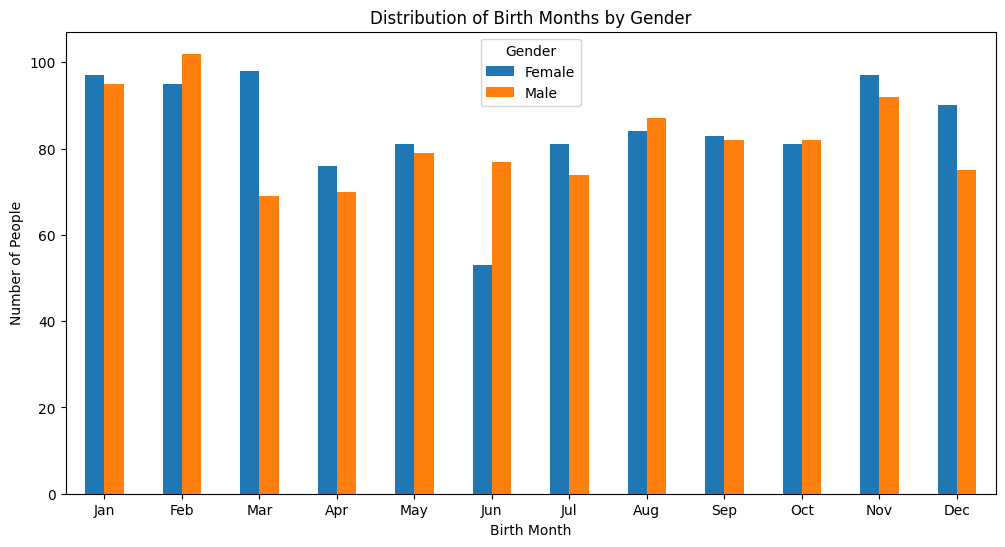

In [73]:
response = agent.invoke({'messages':"Plot me an image of gender and birth_month"})


In [75]:
for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

Plot me an image of gender and birth_month
================================== Ai Message ==================================

Okay, I'll create a plot showing the relationship between gender and birth month from the `users_data.csv` file.

First, I'll read the data into a pandas DataFrame and inspect its structure and contents. This will help me understand the data types and identify any potential issues.
Tool Calls:
  python_repl_tool (5fbb443c-b5e7-4f4d-a06c-db315312d2a7)
 Call ID: 5fbb443c-b5e7-4f4d-a06c-db315312d2a7
  Args:
    code: 
import pandas as pd

df = pd.read_csv('users_data.csv')
print(df.info())
print(df.head())
print(df.describe())
================================= Tool Message =================================
Name: python_repl_tool

Successfully executed:
\`\`\`python

import pandas as pd

df = pd.read_csv('users_data.csv')
print(df.info())
print(df.head())
print(df.describe())

\`\`\`
St